In [11]:
import plotly.graph_objects as go 
import pandas as pd
import numpy as np

In [12]:
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/Clustering/Aula-1.-An%C3%A1lise-Explorat%C3%B3ria/Wine.csv')
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [13]:
# Traduzindo algumas colunas do inglês para o português

barema = {
    'Alcohol' : 'Alcool',
    'Ash_Alcanity' : 'Alcalinidade_po',
    'Magnesium' : 'Magnesio',
    'Color_Intensity' : 'Intensidade_de_cor'

}

df = df.rename(columns = barema)
df.head()

,Alcool,Malic_Acid,Ash,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [14]:
# Análise preliminar dos dados
df.describe()

,Alcool,Malic_Acid,Ash,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [15]:
matriz_corr = df.corr()
matriz_corr

,Alcool,Malic_Acid,Ash,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
Alcool,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
Alcalinidade_po,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
Magnesio,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
Total_Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
Nonflavanoid_Phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
Intensidade_de_cor,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


In [16]:
from biokit.viz import corrplot
import matplotlib.pyplot as plt


C:\Users\joaop\AppData\Local\Temp/ipykernel_12032/1310655410.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


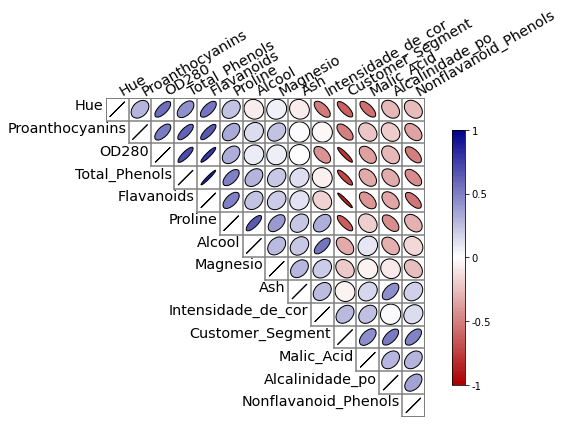

In [17]:
corr_graph = corrplot.Corrplot(matriz_corr)
corr_graph.plot(upper = 'ellipse', fontsize = 'x-large')
fig = plt.gcf()
fig.set_size_inches(15, 8)
fig.show()

flavanoides e total_phenois estão altamente correlacionados, 'Passam a mesma informação'

In [18]:
# normalização manual
atributos = df.columns
for atributo in atributos:
    df[atributo] = (df[atributo] - min(df[atributo])) / (max(df[atributo]) - min(df[atributo]))

In [19]:
# as amostras agora variam de 0 a 1
df.head()

,Alcool,Malic_Acid,Ash,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0.0
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0.0
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0.0
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0.0
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0.0


In [20]:
# Normalizando pelo sklearn
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
np_df = min_max_scaler.fit_transform(df)
df = pd.DataFrame(np_df, columns = atributos)
df.describe()

,Alcool,Malic_Acid,Ash,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446,0.469101
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613,0.387517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702,0.000000
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097,0.500000
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
# Após adequarmos os dados, vamos agrupar com o K-means
from sklearn.cluster import KMeans
agrupador = KMeans(n_clusters=4) # n clusters = numero de grupos
agrupador.fit(df)

KMeans(n_clusters=4)

In [22]:
labels = agrupador.labels_
print(labels) # grupos de 0 a 3

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 3 2 3 3 3 2 3 2 3 2 3
 3 2 3 2 3 3 3 3 2 2 3 3 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 2 3 2 3 2 2 2 3 3 3
 3 2 2 2 2 3 3 2 2 3 3 2 3 3 3 3 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [23]:
# visualizando os grupos
fig = go.Figure()
fig.add_trace(go.Scatter(x = df['Intensidade_de_cor'], y = df['Alcool'],
                 mode = 'markers',
                 marker = dict(color = agrupador.labels_.astype(np.float)),
                 text = labels))


fig.show()


C:\Users\joaop\AppData\Local\Temp/ipykernel_12032/635352707.py:5: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [24]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/Clustering/Aula-1.-An%C3%A1lise-Explorat%C3%B3ria/Wine.csv')
barema = {
    'Alcohol' : 'Alcool',
    'Ash_Alcanity' : 'Alcalinidade_po',
    'Magnesium' : 'Magnesio',
    'Color_Intensity' : 'Intensidade_de_cor'

}

df = df.rename(columns = barema)
atributos = df.columns

In [25]:
# Agora com 3 grupos
from sklearn.cluster import KMeans
agrupador = KMeans(n_clusters=3) # n clusters = numero de grupos
agrupador.fit(df)
labels = agrupador.labels_
print(labels) # grupos de 0 a 2

[0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 2 2 0 0 2 0 0 0 0 0 0 2 2
 0 0 2 2 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 1 1 2 1 1 2 2 2 1 1 0
 2 1 1 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1 1 1 1 2 2 1 2 1 2 1 1 1 2 1 1 1 1 2 1
 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 2 2 2 2 1 1 1 2 2 1 1 2 2 1 2
 2 1 1 1 1 2 2 2 1 2 2 2 1 2 1 2 2 1 2 2 2 2 1 1 2 2 2 2 2 1]


In [26]:
# visualizando os grupos
fig = go.Figure()
fig.add_trace(go.Scatter(x = df['Intensidade_de_cor'], y = df['Alcool'],
                 mode = 'markers',
                 marker = dict(color = agrupador.labels_.astype(float)),
                 text = labels))


fig.show()

In [27]:
# visualizando os grupos em 3D
fig = go.Figure()
fig.add_trace(go.Scatter3d(x = df['Intensidade_de_cor'], y = df['Alcool'], z = df['Proline'],
                 mode = 'markers',
                 marker = dict(color = agrupador.labels_.astype(float)),
                 text = labels))

fig.update_layout(scene = dict(
    xaxis_title = 'Intensidade de cor',
    yaxis_title = 'Álcool',
    zaxis_title = 'Proline'
    )
)

centros = pd.DataFrame(agrupador.cluster_centers_)
centros.columns = atributos

fig.add_trace(go.Scatter3d(x = centros['Intensidade_de_cor'],
                           y = centros['Alcool'],
                           z = centros['Proline'],
                           mode = 'markers',
                           marker = dict(color = 'green'),
                           text = [0, 1, 2] ))



fig.show()

In [28]:

# Normalizando pelo sklearn
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
np_df = min_max_scaler.fit_transform(df)
df = pd.DataFrame(np_df, columns = atributos)

# Utilizando  o DBSCAN
# Agrupamento espacial baseado em densidade para aplicações com ruído
# regiões de alta densidade
# O k-means nao costuma apresentar bons resultados quano há ruídos
# é o sgeundoalgoritmo mais utilizado
# nao funciona bem com dados de alta dimensionalidades
from sklearn.cluster import DBSCAN
agrupador = DBSCAN(eps = 1.31, min_samples=15, metric = 'manhattan')
agrupador.fit(df)

import numpy as np
np.unique(agrupador.labels_) # o -1 significa os ruídos (dados que nao se encaixaram nos parâmetros)

array([-1,  0,  1,  2], dtype=int64)

In [29]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/Clustering/Aula-1.-An%C3%A1lise-Explorat%C3%B3ria/Wine.csv')
barema = {
    'Alcohol' : 'Alcool',
    'Ash_Alcanity' : 'Alcalinidade_po',
    'Magnesium' : 'Magnesio',
    'Color_Intensity' : 'Intensidade_de_cor'

}

df = df.rename(columns = barema)
atributos = df.columns

In [30]:
# Método sem parâmetros (somente um parâmetro que é a largura do circulo de densidade )
# Procura agrupar pontos por regiões de alta densidade e desloca o centro dos cluster para ela
# É bem usado para segmentação de imagens/visão computacional
#  Não funciona bem com dados de alta dimensionalidade
# É computacionalmente caro
from sklearn.cluster import MeanShift
agrupador = MeanShift()
agrupador.fit(df)
agrupador.labels_

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 0,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0], dtype=int64)

In [31]:
from sklearn.cluster import estimate_bandwidth
BW = estimate_bandwidth(df, quantile = 0.1)
agrupador = MeanShift(bandwidth = BW)
agrupador.fit(df)

MeanShift(bandwidth=63.180850991985075)

In [32]:
agrupador.cluster_centers_

array([[1.26176316e+01, 2.58263158e+00, 2.31500000e+00, 2.10473684e+01,
        9.40526316e+01, 1.85394737e+00, 1.51421053e+00, 4.10000000e-01,
        1.37210526e+00, 4.80526313e+00, 8.88684211e-01, 2.30789474e+00,
        5.08710526e+02, 2.39473684e+00],
       [1.27733333e+01, 2.40303030e+00, 2.40393939e+00, 2.04333333e+01,
        9.69696970e+01, 2.02151515e+00, 1.35727273e+00, 4.16363636e-01,
        1.34000000e+00, 5.93030303e+00, 8.60909091e-01, 2.16424242e+00,
        6.50212121e+02, 2.54545455e+00],
       [1.27187879e+01, 2.95060606e+00, 2.39636364e+00, 2.12787879e+01,
        9.57575758e+01, 1.87363636e+00, 1.20818182e+00, 4.04545455e-01,
        1.25181818e+00, 4.97030303e+00, 8.49696970e-01, 2.14878788e+00,
        5.76121212e+02, 2.57575758e+00],
       [1.24477419e+01, 2.19193548e+00, 2.30612903e+00, 2.10193548e+01,
        9.06774194e+01, 2.18419355e+00, 2.00774194e+00, 3.84838710e-01,
        1.56193548e+00, 4.01516126e+00, 9.93870968e-01, 2.56806452e+00,
        4.400

In [33]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=df['Intensidade_de_cor'],
                         y=df['Alcool'], z=df['Proline'],
                         mode = 'markers',                      
                          marker = dict(color = agrupador.labels_.astype(np.float)),
                        text = [0, 1, 2]))
fig.show()

C:\Users\joaop\AppData\Local\Temp/ipykernel_12032/4069099307.py:5: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [34]:
fig.update_layout(scene = dict(
                    xaxis_title='Intensidade de Cor',
                    yaxis_title='Àlcool',
                    zaxis_title='Proline'))
fig.show()

In [35]:
centros = pd.DataFrame(agrupador.cluster_centers_)
centros.columns = atributos

In [36]:
fig.add_trace(go.Scatter3d(x=centros['Intensidade_de_cor'],
                         y=centros['Alcool'], z=centros['Proline'],
                         mode = 'markers',                  
                          marker = dict(color = 'red'),
                        text = [0, 1, 2]))

In [37]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/Clustering/Aula-1.-An%C3%A1lise-Explorat%C3%B3ria/Wine.csv')
barema = {
    'Alcohol' : 'Alcool',
    'Ash_Alcanity' : 'Alcalinidade_po',
    'Magnesium' : 'Magnesio',
    'Color_Intensity' : 'Intensidade_de_cor'

}

df = df.rename(columns = barema)
atributos = df.columns

In [38]:
# O coeficiente de silhueta é uma métrica que analisa o quanto os pontos dos nossos clusters estão próximos dos demais pontos e afastado dos pontos do cluster vizinho
# Avalia coesão (proximidade) e dissimilaridade (afastamento)
# Quanto maior o valor da silhueta melhor

from sklearn.metrics import silhouette_score
faixa_n_clusters = [i for i in range(2, 10)]
print(faixa_n_clusters)

[2, 3, 4, 5, 6, 7, 8, 9]


In [39]:
from sklearn.cluster import KMeans
valores_silhueta = []
for k in faixa_n_clusters:
    agrupador = KMeans(n_clusters= k)
    labels = agrupador.fit_predict(df)
    media_silhueta = silhouette_score(df, labels)
    valores_silhueta.append(media_silhueta)

In [41]:


fig.add_trace(go.Scatter(x= faixa_n_clusters,
                         y= valores_silhueta,
                         ))
fig.update_layout(
    title = "Valores de Silhueta Médio",
    xaxis_title = "Número de Clusters",
    yaxis_title = "Valor médio de silhueta"
)
fig.show()

In [42]:
# O melhor valor de silhueta que temos é em 2 clusters
faixa_quantil = np.linspace(0.02, 0.5, 15)
faixa_quantil

array([0.02      , 0.05428571, 0.08857143, 0.12285714, 0.15714286,
       0.19142857, 0.22571429, 0.26      , 0.29428571, 0.32857143,
       0.36285714, 0.39714286, 0.43142857, 0.46571429, 0.5       ])

In [44]:
valores_silhueta = []
quantil_plot = []
for quantil in faixa_quantil:
    bandwidth = estimate_bandwidth(df, quantile = quantil)
    agrupador = MeanShift(bandwidth = bandwidth)
    labels = agrupador.fit_predict(df)
    if (len(np.unique(labels)) < len(df) and len(np.unique(labels)) > 1):
        media_silhueta = silhouette_score(df, labels)
        valores_silhueta.append(media_silhueta)
        quantil_plot.append(quantil)

In [45]:
fig.add_trace(go.Scatter(x= quantil_plot,
                         y= valores_silhueta,
                         ))
fig.update_layout(
    xaxis_title = "Quantil",
    yaxis_title = "Valor médio de silhueta"
)
fig.show()

In [62]:
# Comparação entre os algoritmos 
from sklearn.cluster import KMeans, MeanShift, DBSCAN, estimate_bandwidth
from sklearn.metrics import silhouette_score

# Agrupadores
agrupador_kmeans = KMeans(n_clusters= 3)
agrupador_DBSCAN = DBSCAN(eps = 2.1, min_samples= 56, metric = 'manhattan')
BW = estimate_bandwidth(df, quantile= 0.465)
agrupador_meanshift = MeanShift(bandwidth= BW)

labels_kmeans = agrupador_kmeans.fit_predict(df)
labels_DBSCAN = agrupador_DBSCAN.fit_predict(df)
labels_meanshift = agrupador_meanshift.fit_predict(df)

print('\nLabels K-means: ', labels_kmeans)
print('\nLabels DBSCAN: ', labels_DBSCAN)
print('\nLabels Meanshift: ', labels_meanshift)


Labels K-means:  [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1
 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 2 2 1 2 2 1 1 1 2 2 0
 1 2 2 2 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 2 2 1 1 2 1 2 1 2 2 2 1 2 2 2 2 1 2
 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 1 1 1 1 2 2 2 1 1 2 2 1 1 2 1
 1 2 2 2 2 1 1 1 2 1 1 1 2 1 2 1 1 2 1 1 1 1 2 2 1 1 1 1 1 2]

Labels DBSCAN:  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]

Labels Meanshift:  [1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [63]:
print('O coeficiente de Silhoueta do Kmeans é: ', silhouette_score(df, labels_kmeans))
#print('O coeficiente de Silhoueta do DBSCAN é: ', silhouette_score(df, labels_DBSCAN)) somente ruido nao tem silhoueta
print('O coeficiente de Silhoueta do MeanShift é: ', silhouette_score(df, labels_meanshift))

O coeficiente de Silhoueta do Kmeans é:  0.5711220218931753
O coeficiente de Silhoueta do MeanShift é:  0.6493586170880333
